# Assignment KNN
Extract features from 300 images from kagel (cat dog panda) 100 images each. and perform 5 fold crossvalidation and plot results with matplot library.

In [25]:
import os
import cv2
import numpy as np

image_dir = "/content/drive/MyDrive/dataset"

In [26]:
image_features = []
image_filenames = []

for filename in os.listdir(image_dir):
    if filename.lower().endswith(".jpg"):
        img_path = os.path.join(image_dir, filename)
        img = cv2.imread(img_path)

        if img is not None:
            hist = cv2.calcHist([img], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
            hist = cv2.normalize(hist, hist).flatten()

            image_features.append(hist)
            image_filenames.append(filename)

image_features = np.array(image_features)

In [27]:
category_mapping = {"panda": 2, "cats": 0, "dogs": 1}
image_labels = []

for filename in image_filenames:
    try:
        category = filename.split("_")[0].lower()
        if category in category_mapping:
            image_labels.append(category_mapping[category])
        else:
            print(f"Warning: Unknown category in filename: {filename}")
            image_labels.append(-1)
    except Exception as e:
        print(f"Error processing filename {filename}: {e}")
        image_labels.append(-1)

image_labels = np.array(image_labels)

print("Image labels extracted:", image_labels)

Image labels extracted: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2]


In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from statistics import mean

In [29]:
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k, p=1)
    scores = cross_val_score(knn, image_features, image_labels, cv=5)
    print(f"Cross-validation scores for k={k}: {scores}")

Cross-validation scores for k=1: [0.48333333 0.65       0.48333333 0.28333333 0.43333333]
Cross-validation scores for k=2: [0.48333333 0.58333333 0.5        0.35       0.48333333]
Cross-validation scores for k=3: [0.55       0.58333333 0.61666667 0.45       0.46666667]
Cross-validation scores for k=4: [0.5        0.56666667 0.55       0.38333333 0.5       ]
Cross-validation scores for k=5: [0.58333333 0.58333333 0.6        0.5        0.45      ]
Cross-validation scores for k=6: [0.55       0.55       0.61666667 0.53333333 0.48333333]
Cross-validation scores for k=7: [0.58333333 0.56666667 0.6        0.53333333 0.46666667]
Cross-validation scores for k=8: [0.56666667 0.51666667 0.66666667 0.51666667 0.48333333]
Cross-validation scores for k=9: [0.5        0.56666667 0.6        0.48333333 0.51666667]
Cross-validation scores for k=10: [0.56666667 0.61666667 0.61666667 0.51666667 0.5       ]
Cross-validation scores for k=11: [0.56666667 0.61666667 0.68333333 0.53333333 0.48333333]
Cross-va

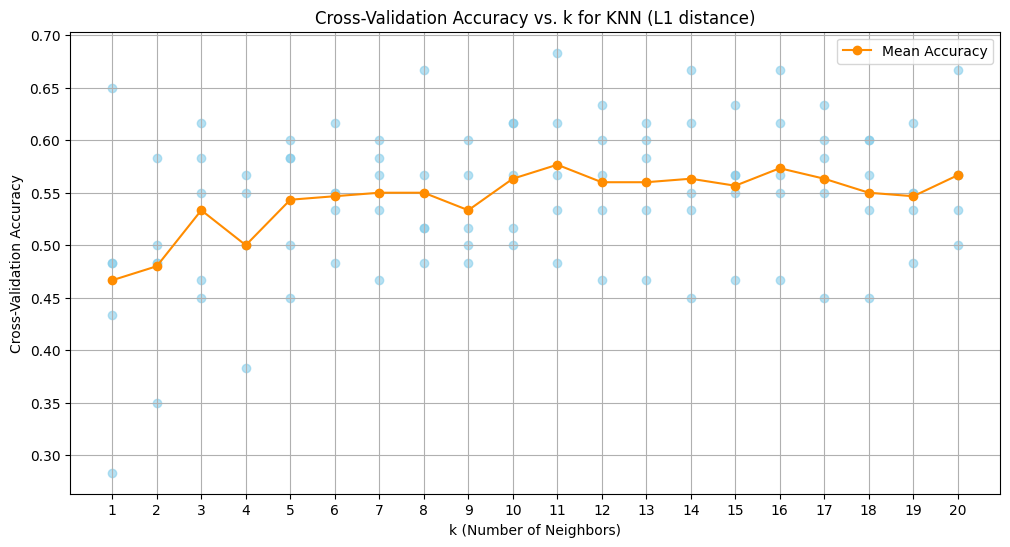

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from statistics import mean
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

k_values = range(1, 21)
all_scores = []
mean_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, p=1)
    scores = cross_val_score(knn, image_features, image_labels, cv=5)
    all_scores.append(scores)
    mean_scores.append(mean(scores))

plt.figure(figsize=(12, 6))

for i, k in enumerate(k_values):
    plt.scatter([k] * len(all_scores[i]), all_scores[i], color='skyblue', alpha=0.6)

plt.plot(k_values, mean_scores, marker='o', linestyle='-', color='darkorange', label='Mean Accuracy')

plt.title('Cross-Validation Accuracy vs. k for KNN (L1 distance)')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Cross-Validation Accuracy')
plt.xticks(list(k_values))
plt.grid(True)
plt.legend()
plt.show()